In [1]:
import warnings
warnings.filterwarnings("ignore")

import datetime as dt

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
df.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...


In [3]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [5]:
(df
 .memory_usage()
 .sum()
)

548000

In [6]:
df.assign(incident_time = df['Date'] +" "+ df['Time'])

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,incident_time
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",09/17/1908 17:18
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,07/12/1912 06:30
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,NaN
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,09/09/1913 18:30
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,10/17/1913 10:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",05/20/2009 06:30
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,NaN
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,06/01/2009 00:15
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,06/07/2009 08:30


In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.head()

,date,time,location,operator,flight #,route,type,registration,cn/in,aboard,fatalities,ground,summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [9]:
df.rename({'flight #':'flight_number'}, inplace=True)

In [12]:
df.describe(include='object').T

,count,unique,top,freq
date,5268,4753,09/11/2001,4
time,3049,1005,15:00,32
location,5248,4303,"Sao Paulo, Brazil",15
operator,5250,2476,Aeroflot,179
flight #,1069,724,-,67
route,3562,3244,Training,81
type,5241,2446,Douglas DC-3,334
registration,4933,4905,49,3
cn/in,4040,3707,178,6
summary,4878,4673,Crashed during takeoff.,15


In [15]:
#df.location.nunique()
df.location.value_counts()

Sao Paulo, Brazil                    15
Moscow, Russia                       15
Rio de Janeiro, Brazil               14
Anchorage, Alaska                    13
Manila, Philippines                  13
                                     ..
Near Charana, Bolivia                 1
Monte Matto, Italy                    1
Misaki Mountain, Japan                1
Angelholm, Sweden                     1
State of Arunachal Pradesh, India     1
Name: location, Length: 4303, dtype: int64

In [16]:
df.fatalities.sum()

105479.0

<AxesSubplot: xlabel='fatalities', ylabel='Density'>

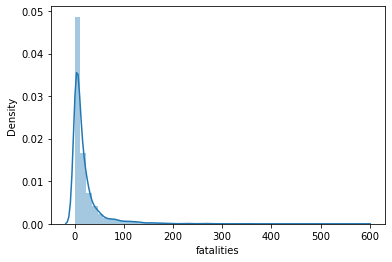

In [17]:
sns.distplot(df.fatalities)

<AxesSubplot: >

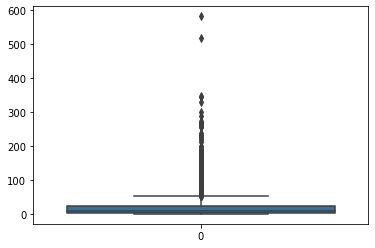

In [18]:
sns.boxplot(df.fatalities)

In [28]:
df.fatalities.max()

583.0

In [61]:
df.fatalities.min()

0.0

In [39]:
df.loc[583.0]

date                                                   05/12/1942
time                                                        11:51
location                                      Miles City, Montana
operator                                Northwest Orient Airlines
flight #                                                        1
route                                           Chicago - Seattle
type                                           Douglas DC-3-A-269
registration                                             NC 21714
cn/in                                                        2129
aboard                                                       14.0
fatalities                                                    3.0
ground                                                        0.0
summary         The plane hit an obstruction at the end of the...
Name: 583, dtype: object

In [27]:
df.loc[df.fatalities.max()]

date                                                   05/12/1942
time                                                        11:51
location                                      Miles City, Montana
operator                                Northwest Orient Airlines
flight #                                                        1
route                                           Chicago - Seattle
type                                           Douglas DC-3-A-269
registration                                             NC 21714
cn/in                                                        2129
aboard                                                       14.0
fatalities                                                    3.0
ground                                                        0.0
summary         The plane hit an obstruction at the end of the...
Name: 583, dtype: object

In [41]:
df['date'] = pd.to_datetime(df['date'])

In [50]:
df.date.dt.year.nunique()

98

In [58]:
df.date.dt.year.value_counts()

1972    104
1968     96
1989     95
1967     91
1979     89
       ... 
1918      4
1913      3
1915      2
1912      1
1908      1
Name: date, Length: 98, dtype: int64

In [59]:
df.date.dt.year.max()

2009

<AxesSubplot: ylabel='count'>

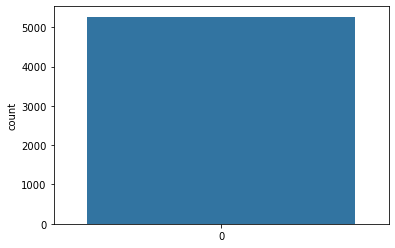

In [57]:
sns.countplot(df['date'].dt.year)

In [64]:
(df
 .groupby(pd.Grouper(key='date',freq='1Y'))['operator'].value_counts()
)

date        operator                 
1908-12-31  Military - U.S. Army         1
1912-12-31  Military - U.S. Navy         1
1913-12-31  Military - German Navy       2
            Private                      1
1915-12-31  Military - German Navy       2
                                        ..
2009-12-31  Petroleum Helicopters Inc    1
            Service Air                  1
            Strait Air                   1
            Turkish Airlines             1
            US Airways                   1
Name: operator, Length: 4353, dtype: int64

In [66]:
df.operator.nunique()

2476

In [67]:
df.operator.value_counts()

Aeroflot                               179
Military - U.S. Air Force              176
Air France                              70
Deutsche Lufthansa                      65
Air Taxi                                44
                                      ... 
Military - Argentine Navy                1
Richland Flying Service - Air Taxii      1
Harbor Airlines - Air Taxi               1
Aerovias Venezolanas SA (Venezuela)      1
Strait Air                               1
Name: operator, Length: 2476, dtype: int64

In [73]:
(x.str.lower() for x in df.operator)

<generator object <genexpr> at 0x000001AC33F29B60>